In [1]:
# Ryan Picariello - 800856548 - Intro to ML Homework 1 Part 3a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Ryanj/Downloads/Housing.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)

In [3]:
housing = pd.DataFrame(pd.read_csv('C:/Users/Ryanj/Downloads/Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = np.random)

In [6]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Normalization = df_Newtrain
df_Standardization  = df_Newtrain
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# define standard scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Normalization[num_vars] = scaler.fit_transform(df_Normalization[num_vars])
df_Normalization.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212


In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_Standardization[num_vars] = scaler.fit_transform(df_Standardization[num_vars])
df_Standardization.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,-0.286366,0.073764,-0.581230,0.207401,-0.822960,-0.868394
392,-0.544762,0.073764,-0.581230,0.207401,-0.822960,-0.677628
231,-0.377564,0.073764,-0.581230,-0.937813,-0.822960,-0.041744
271,-1.601145,2.884176,-0.581230,0.207401,-0.822960,-0.228768
250,-0.787958,0.073764,-0.581230,1.352614,-0.822960,-0.135256
541,-1.350349,0.073764,-0.581230,-0.937813,-0.822960,-1.603589
461,-0.053303,-1.331442,-0.581230,-0.937813,-0.822960,-0.902058
124,0.739618,0.073764,1.488383,2.497828,0.321375,0.631546
154,-0.717026,0.073764,1.488383,0.207401,1.465710,0.407116
451,0.853616,-1.331442,-0.581230,-0.937813,-0.822960,-0.864653


In [9]:
XTrain_N = df_Normalization.values[:,[0,1,2,3,4]]
YTrain_N = df_Normalization.values[:,5]

XTest = df_Newtest.values[:,[0,1,2,3,4]]
YTest = df_Newtest.values[:,5]

XTrain_S = df_Standardization.values[:,[0,1,2,3,4]]
YTrain_S = df_Standardization.values[:,5]

In [10]:
mean = np.ones(XTrain_N.shape[1])
std = np.ones(XTrain_N.shape[1])
for i in range(0, XTrain_N.shape[1]):
    mean[i] = np.mean(XTrain_N.transpose()[i])
    std[i] = np.std(XTrain_N.transpose()[i])
    for j in range(0, XTrain_N.shape[0]):
        XTrain_N[j][i] = (XTrain_N[j][i] - mean[i])/std[i]

In [11]:
mean = np.ones(XTrain_S.shape[1])
std = np.ones(XTrain_S.shape[1])
for i in range(0, XTrain_S.shape[1]):
    mean[i] = np.mean(XTrain_S.transpose()[i])
    std[i] = np.std(XTrain_S.transpose()[i])
    for j in range(0, XTrain_S.shape[0]):
        XTrain_S[j][i] = (XTrain_S[j][i] - mean[i])/std[i]

In [12]:
mean = np.ones(XTest.shape[1])
std = np.ones(XTest.shape[1])
for i in range(0, XTest.shape[1]):
    mean[i] = np.mean(XTest.transpose()[i])
    std[i] = np.std(XTest.transpose()[i])
    for j in range(0, XTest.shape[0]):
        XTest[j][i] = (XTest[j][i] - mean[i])/std[i]

In [13]:
def compute_cost(X, n, theta):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [20]:
def gradient_descent(X, y, theta, alpha, iterations, n, h):
    cost = np.ones(iterations)
    lam= 5000
    for i in range(0,iterations):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = (theta[j]*(1-(alpha*(lam/X.shape[0])))) - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = compute_cost(X, n, theta)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [21]:
def linear_regression(X, y, alpha, iterations):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = compute_cost(X, n, theta)
    theta, cost = gradient_descent(X, y, theta, alpha, iterations, n, h)
    return theta, cost

In [22]:
iterations = 500;
alpha = 0.01;

In [23]:
ThetaTrain, CostTrain = linear_regression(XTrain_N, YTrain_N, alpha, iterations)
print('Final value of theta with normalization =', ThetaTrain)
CostTrain = list(CostTrain)
nIterations_Training = [x for x in range(1,(iterations + 1))]

Final value of theta with normalization = [[1.45777237e-16 3.48009818e-02 2.44727614e-02 3.27690196e-02
  2.68501832e-02 2.36723160e-02]]


In [24]:
ThetaTrain2, CostTrain2 = linear_regression(XTrain_S, YTrain_S, alpha, iterations)
print('Final value of theta with standardization =', ThetaTrain2)
CostTrain2 = list(CostTrain2)
nIterations_Training2 = [x for x in range(1,(iterations + 1))]

Final value of theta with standardization = [[1.45777237e-16 3.48009818e-02 2.44727614e-02 3.27690196e-02
  2.68501832e-02 2.36723160e-02]]


In [25]:
theta_Test, cost_Test = linear_regression(XTest, YTest, alpha, iterations)
print('Final value of theta of the test set =', theta_Test)
cost_Test = list(cost_Test)
nIterations_Test = [x for x in range(1,(iterations + 1))]

Final value of theta of the test set = [[4715355.79822782   20504.02734063   16283.46187037   23092.80303923
    15597.1540135    11461.89955231]]


Text(0.5, 1.0, 'Convergence of gradient descent')

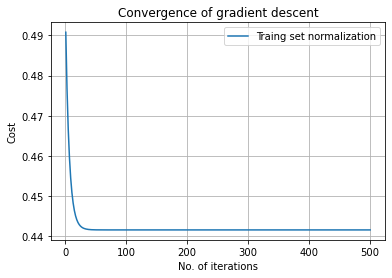

In [26]:
plt.plot(nIterations_Training, CostTrain, label='Traing set normalization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

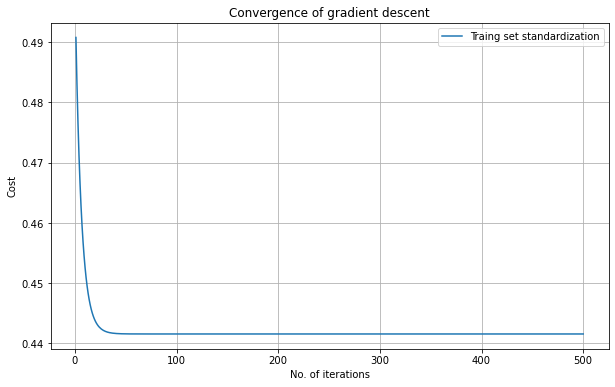

In [27]:
plt.plot(nIterations_Training2, CostTrain2, label='Traing set standardization')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

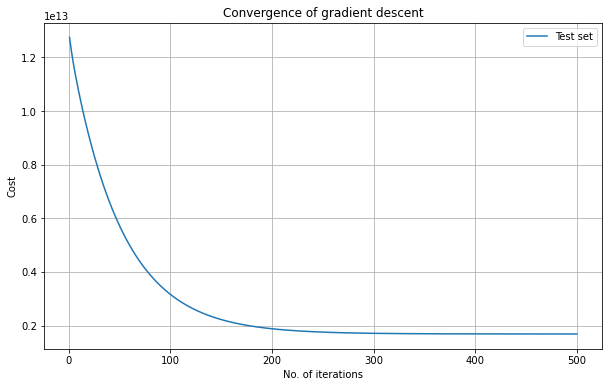

In [28]:
plt.plot(nIterations_Test, cost_Test, label='Test set')
plt.legend()
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')